In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')

In [3]:
dane = pd.read_csv('analiza_termiczna_1.txt','\t')

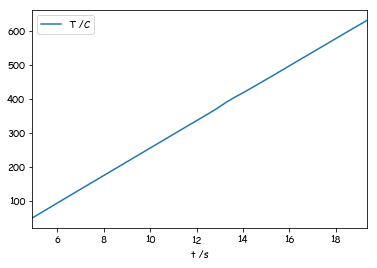

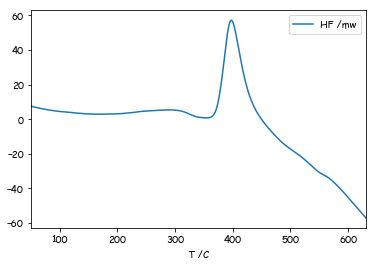

In [4]:
dane.plot('t /s','T /C')
dane.plot('T /C','HF /mw')

,t /s,T /C,HF /mw
825,11.796,327.571,2.529


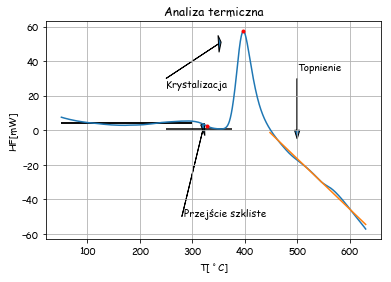

In [117]:
ax = plt.axes()
ax.arrow(280,-50,40,50,head_width=10, head_length=5)
ax.text(285,-50,'Przejście szkliste')
ax.arrow(250,30,100,20,head_width=10, head_length=5)
ax.text(250,25,'Krystalizacja')
ax.arrow(500,30,0,-30,head_width=10, head_length=5)
ax.text(500,35,'Topnienie')
plt.plot(dane['T /C'],dane['HF /mw'])
plt.grid()
plt.title('Analiza termiczna')
plt.xlabel(r'T[$^\circ$C]')
plt.ylabel('HF[mW]')
#Przejscie Szkliste
dane_szkliste = dane[dane['T /C'] <= 300]
szkliste = np.polyfit(dane_szkliste['T /C'],dane_szkliste['HF /mw'],0)
plt.hlines(np.polyval(szkliste,[50,200]),50,300)
#Początek powstawania kryształu
krysztal_min = dane[dane['HF /mw'] == min(dane['HF /mw'][dane['T /C']<400])]
krysztal_min = krysztal_min[krysztal_min['T /C'] == min(krysztal_min['T /C'])] #Minimum między szklistym a krystalizacją
plt.hlines(krysztal_min['HF /mw'],250,375)
szkliste_srednia = (szkliste+krysztal_min['HF /mw'])/2 
dane_szkliste_temp = dane[dane['T /C']<float(krysztal_min['T /C'])]
szkliste_temp =  dane_szkliste_temp.loc[(dane_szkliste_temp['HF /mw']-float(szkliste_srednia)).abs().argsort()[:1]] #Temperatura przejscia szklistego
plt.plot(szkliste_temp['T /C'],szkliste_temp['HF /mw'],'r.') 
#Powstawanie kryształu
maksimum_krystalizacji = dane[dane['HF /mw'] == max(dane['HF /mw'])] # Temperatura krystalizacji
plt.plot(maksimum_krystalizacji['T /C'],maksimum_krystalizacji['HF /mw'],'.r')
dane_krystalizacja = dane[int(krysztal_min.index.values):int(maksimum_krystalizacji.index.values)]
# krystalizacja = np.polyfit(dane_krystalizacja['T /C'],dane_krystalizacja['HF /mw'])


#Topnienie
dane_topnienie = dane[dane['HF /mw'] < float(krysztal_start['HF /mw'])]
topnienie = np.polyfit(dane_topnienie['T /C'],dane_topnienie['HF /mw'],1)
plt.plot(dane_topnienie['T /C'],np.polyval(topnienie,dane_topnienie['T /C']))
#temperatura topnienia ?

plt.savefig('Analiza_termiczna.png',dpi = 400)
szkliste_temp